In [14]:
import numpy as np
from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient
import matplotlib.pyplot as plt

import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import lsst_efd_client
#sys.path
print(lsst_efd_client.__file__, '\n', lsst_efd_client.__version__)

/Applications/miniconda3/envs/p3/lib/python3.7/site-packages/lsst_efd_client/__init__.py 
 __version__ = '0.5.0'


In [3]:
client = EfdClient('summit_efd')
csc_index = 1

start = Time('2020-11-06T14:40:00') #this is UTC
#end = start+timedelta(days=1)
#end = Time(datetime.now())
end = Time('2020-11-06T15:05:30') #this is UTC
#start = end - timedelta(seconds=5)

In [4]:
df = await client.select_time_series('lsst.sal.Hexapod.Application', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfe = await client.select_time_series('lsst.sal.Hexapod.logevent_controllerState', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfi = await client.select_time_series('lsst.sal.Hexapod.logevent_inPosition', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfc = await client.select_time_series('lsst.sal.Hexapod.command_stop', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfm = await client.select_time_series('lsst.sal.Hexapod.command_move', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfml = await client.select_time_series('lsst.sal.Hexapod.command_moveLUT', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfo = await client.select_time_series('lsst.sal.Hexapod.command_offset', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [5]:
dfps = await client.select_time_series('lsst.sal.Hexapod.command_positionSet', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [6]:
dfs = await client.select_time_series('lsst.sal.Hexapod.Actuators', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [7]:
client.query_history #without the backslashes it should work in Chronograf; useful for debugging queries

['SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.Application" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.logevent_controllerState" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.logevent_inPosition" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.command_stop" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.command_move" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.command_moveLUT" WHERE time >= \'2020-11-06T14:40:00.000Z\' AND time <= \'2020-11-06T15:05:30.000Z\'',
 'SELECT * FROM "efd"."autogen"."lsst.sal.Hexapod.command_offset" WHERE time >=

In [8]:
df

,Demand0,Demand1,Demand2,Demand3,Demand4,Demand5,Error0,Error1,Error2,Error3,...,Position3,Position4,Position5,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-11-06 14:40:00.045000+00:00,0,0.0,0,0.000,0.000,0.000,10.604607,0.656385,-9.630102,-0.000006,...,-0.000006,-0.00005,0.000201,-1947880953,1.604674e+09,254,1.604674e+09,edce0ec0,25745,1.604674e+09
2020-11-06 14:40:00.086000+00:00,0,0.0,0,0.000,0.000,0.000,10.604615,0.655885,-9.630577,-0.000006,...,-0.000006,-0.00005,0.000202,-1947880953,1.604674e+09,254,1.604674e+09,edce0ec0,25746,1.604674e+09
2020-11-06 14:40:00.136000+00:00,0,0.0,0,0.000,0.000,0.000,10.606716,0.655979,-9.630232,-0.000006,...,-0.000006,-0.00005,0.000202,-1947880953,1.604674e+09,254,1.604674e+09,edce0ec0,25747,1.604674e+09
2020-11-06 14:40:00.177000+00:00,0,0.0,0,0.000,0.000,0.000,10.606951,0.657315,-9.630229,-0.000006,...,-0.000006,-0.00005,0.000201,-1947880953,1.604674e+09,254,1.604674e+09,edce0ec0,25748,1.604674e+09
2020-11-06 14:40:00.226000+00:00,0,0.0,0,0.000,0.000,0.000,10.608989,0.654470,-9.630874,-0.000006,...,-0.000006,-0.00005,0.000201,-1947880953,1.604674e+09,254,1.604674e+09,edce0ec0,25749,1.604674e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-06 15:05:29.795000+00:00,1700,200.0,1420,0.032,-0.021,0.016,1.242126,0.597461,0.291987,0.000012,...,0.032012,-0.02103,0.015993,-1947880953,1.604675e+09,254,1.604675e+09,edce0ec0,59737,1.604675e+09
2020-11-06 15:05:29.846000+00:00,1700,200.0,1420,0.032,-0.021,0.016,1.240090,0.598675,0.290901,0.000012,...,0.032012,-0.02103,0.015993,-1947880953,1.604675e+09,254,1.604675e+09,edce0ec0,59738,1.604675e+09
2020-11-06 15:05:29.885000+00:00,1700,200.0,1420,0.032,-0.021,0.016,1.244878,0.602051,0.290572,0.000012,...,0.032012,-0.02103,0.015993,-1947880953,1.604675e+09,254,1.604675e+09,edce0ec0,59739,1.604675e+09
2020-11-06 15:05:29.935000+00:00,1700,200.0,1420,0.032,-0.021,0.016,1.239857,0.603662,0.291669,0.000012,...,0.032012,-0.02103,0.015993,-1947880953,1.604675e+09,254,1.604675e+09,edce0ec0,59740,1.604675e+09


In [9]:
dfps.iloc[2]

HexapodID                       1
private_host            170525168
private_kafkaStamp    1.60467e+09
private_origin                820
private_rcvStamp      1.60467e+09
private_revCode          d8bcfa14
private_seqNum         1483416430
private_sndStamp      1.60467e+09
sync                         True
u                               0
v                               0
w                               0
x                               0
y                               0
z                            5000
Name: 2020-11-06 14:47:31.873000+00:00, dtype: object

In [10]:
dfm

,HexapodID,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,state
2020-11-06 14:43:13.997000+00:00,1,170525168,1.604674e+09,820,1.604674e+09,b400cc48,1131327899,1.604674e+09,False
2020-11-06 14:47:31.895000+00:00,1,170525168,1.604674e+09,820,1.604674e+09,b400cc48,1131327900,1.604674e+09,False
2020-11-06 14:56:15.622000+00:00,1,170525168,1.604675e+09,820,1.604675e+09,b400cc48,1131327901,1.604675e+09,False


In [11]:
dfc

,HexapodID,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,state
2020-11-06 14:47:34.907000+00:00,1,170525168,1.604674e+09,820,1.604674e+09,05f6f75d,2023028216,1.604674e+09,0


In [12]:
cc = ['b','y','g','m','k','c']
xyzlabel = ['X', 'Y', 'Z', 'RX', 'RY', 'RZ']

### This is an overall picture of what happened in that time window.

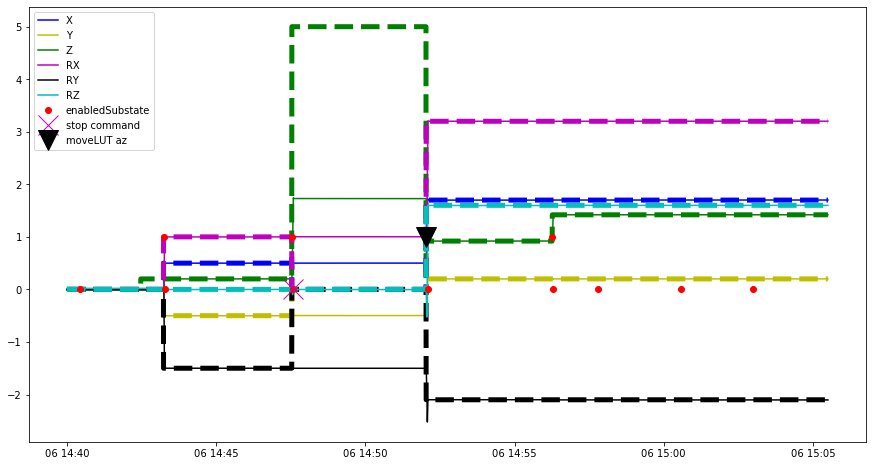

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(0,6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(df['Position%d'%i]*f, '-%s'%cc[i], label=xyzlabel[i])
    plt.plot(df['Demand%d'%i]*f, '--%s'%(cc[i]), linewidth=5)
plt.plot(dfe['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(dfi['inPosition'],'mx', label='inPosition')
plt.plot(dfc['state'],'mx', label='stop command', markersize=20)
plt.plot(dfml['HexapodID'],'kv', label='moveLUT az', markersize=20)
plt.legend();

#### zoom onto the first move

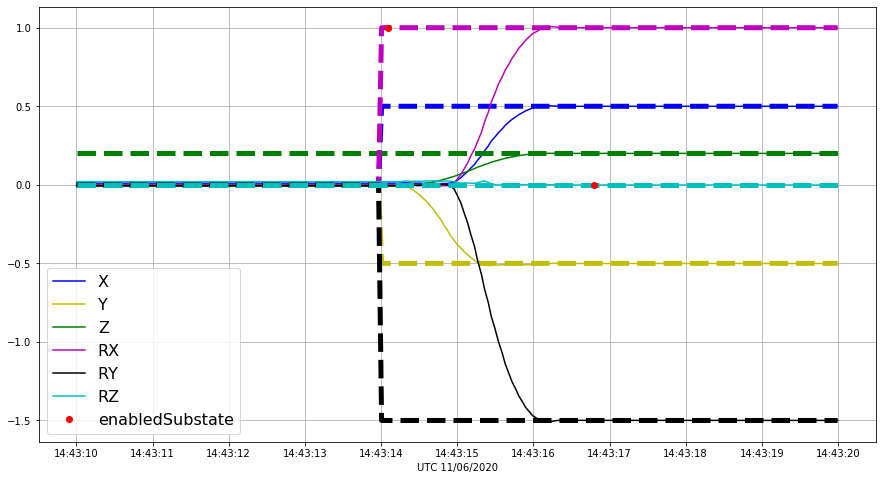

In [16]:
start1 = datetime.strptime('2020-11-06T14:43:10', '%Y-%m-%dT%H:%M:%S')
end1 = datetime.strptime('2020-11-06T14:43:20', '%Y-%m-%dT%H:%M:%S')
idx = np.logical_and(pd.to_datetime(df.private_sndStamp, unit='s') > start1, 
                     pd.to_datetime(df.private_sndStamp, unit='s') < end1)
df1 = df[idx]
idx = np.logical_and(pd.to_datetime(dfe.private_sndStamp, unit='s') > start1, #dfe is controllerState Event.
                     pd.to_datetime(dfe.private_sndStamp, unit='s') < end1)
dfe1 = dfe[idx]
#idx = np.logical_and(pd.to_datetime(dfi.private_sndStamp, unit='s') > start1, pd.to_datetime(dfi.private_sndStamp, unit='s') < end1)
#dfi1 = dfi[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(df1['Position%d'%i]*f,'-%s'%cc[i], label=xyzlabel[i])
    plt.plot(df1['Demand%d'%i]*f, '--%s'%(cc[i]), linewidth=5)
plt.plot(pd.to_datetime(dfe1.private_sndStamp, unit='s'), dfe1['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.legend(prop={'size': 16})
plt.xlabel('UTC 11/06/2020')
plt.grid();
#step 14: move (500um, -500um, 200um, 0.01deg, -0.015deg, 0deg)
# z demand is already at 200um prior to this move because we did positionSet without moving
#    await hexapod_csc.cmd_positionSet.set_start(x=0,y=0,z=200, u=0,v=0,w=0,sync=True)

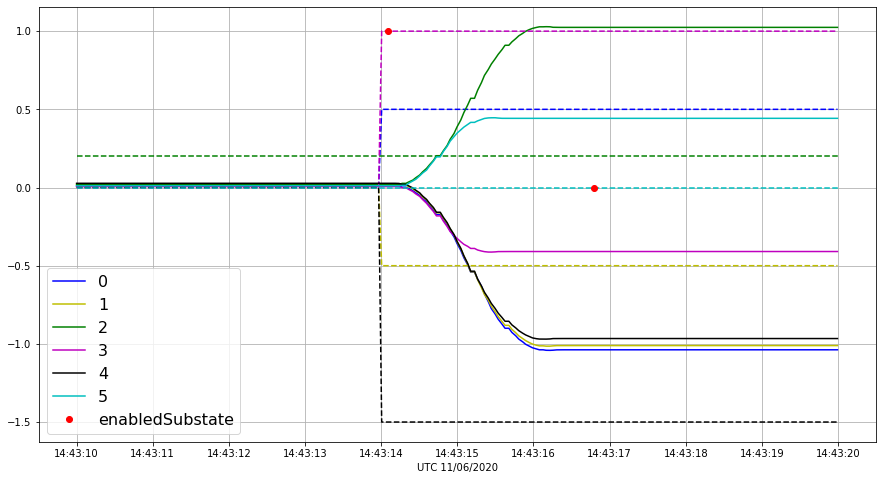

In [17]:
idx = np.logical_and(pd.to_datetime(dfs.private_sndStamp, unit='s') > start1, 
                     pd.to_datetime(dfs.private_sndStamp, unit='s') < end1) #dfs is for the individual Structs
dfs1 = dfs[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(dfs1['Calibrated%d'%i]/500,'-%s'%cc[i], label='%d'%i)
    plt.plot(df1['Demand%d'%i]*f, '--%s'%(cc[i]))
plt.plot(pd.to_datetime(dfe1.private_sndStamp, unit='s'), dfe1['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.legend(prop={'size': 16})
plt.xlabel('UTC 11/06/2020')
plt.grid();

#### Move onto the 2nd move/motion

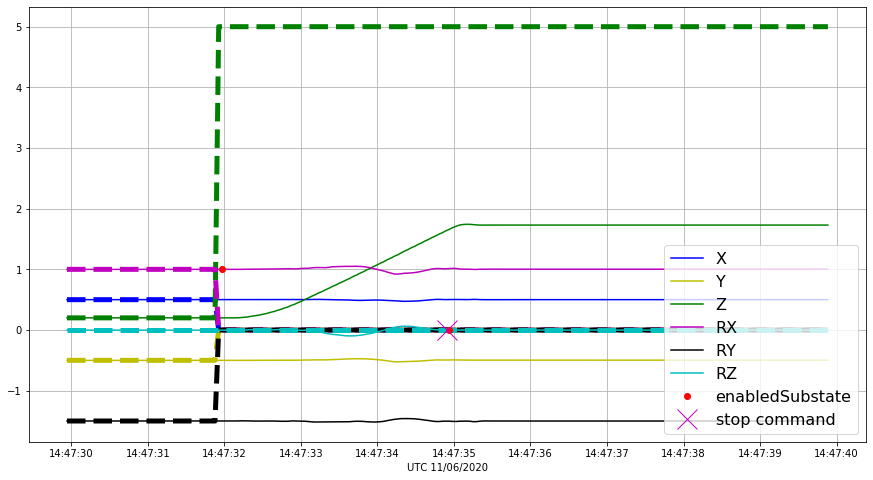

In [18]:
start2 = pd.to_datetime(dfc['private_sndStamp'][0], unit='s')-timedelta(seconds=5) 
end2 = pd.to_datetime(dfc['private_sndStamp'][0], unit='s')+timedelta(seconds=5) 
idx = np.logical_and(pd.to_datetime(df.private_sndStamp, unit='s') > start2, 
                     pd.to_datetime(df.private_sndStamp, unit='s') < end2)
df2 = df[idx]
idx = np.logical_and(pd.to_datetime(dfe.private_sndStamp, unit='s') > start2, 
                     pd.to_datetime(dfe.private_sndStamp, unit='s') < end2)
dfe2 = dfe[idx]
#idx = np.logical_and(pd.to_datetime(dfi.private_sndStamp, unit='s') > start1, pd.to_datetime(dfi.private_sndStamp, unit='s') < end1)
#dfi1 = dfi[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(df2['Position%d'%i]*f, '-%s'%cc[i], label=xyzlabel[i])
    plt.plot(df2['Demand%d'%i]*f, '--%s'%(cc[i]), linewidth=5)
plt.plot(pd.to_datetime(dfe2.private_sndStamp, unit='s'), dfe2['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfc.private_sndStamp, unit='s'), dfc['state'],'mx', label='stop command', markersize=20)
plt.legend(prop={'size': 16}, loc='lower right')
plt.xlabel('UTC 11/06/2020')
plt.grid();
# step 18: (0um, 0um, 5000um, 0deg, 0deg, 0deg)

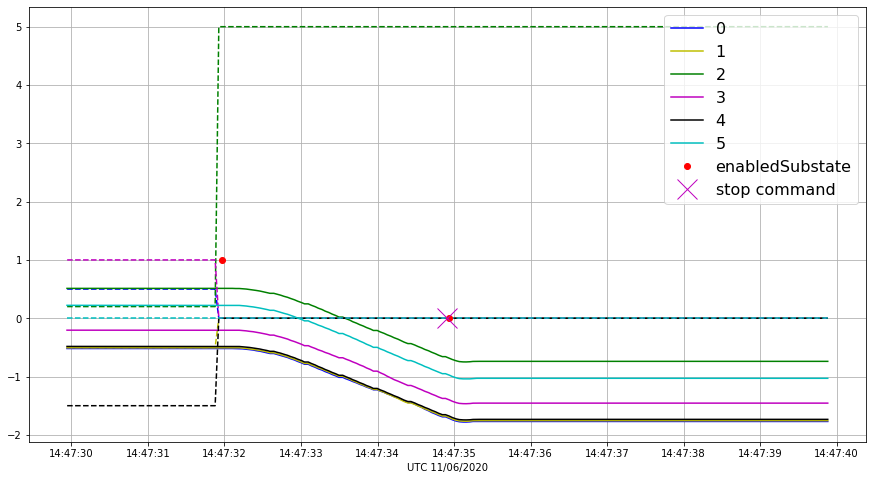

In [19]:
idx = np.logical_and(pd.to_datetime(dfs.private_sndStamp, unit='s') > start2, 
                     pd.to_datetime(dfs.private_sndStamp, unit='s') < end2)
dfs2 = dfs[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(dfs2['Calibrated%d'%i]/1000, '-%s'%cc[i], label='%d'%i)
    plt.plot(df2['Demand%d'%i]*f, '--%s'%(cc[i]))
plt.plot(pd.to_datetime(dfe2.private_sndStamp, unit='s'), dfe2['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfc.private_sndStamp, unit='s'), dfc['state'],'mx', label='stop command', markersize=20)
plt.legend(prop={'size': 16}, loc='upper right')
plt.xlabel('UTC 11/06/2020')
plt.grid();
# step 18: (0um, 0um, 5000um, 0deg, 0deg, 0deg)

In [20]:
#step 27: (0um, 0um, 800um, 0deg, 0deg, 0deg), moveLUT (az = 180deg, elev = 60deg, and T = 10deg)
#check different values to make sure output agrees with https://github.com/bxin/hexrot/blob/master/hexLUT.ipynb
elev = 60 #30 
plut = np.zeros(6)
coeff = np.loadtxt('camLUT.txt')
for i in range(6):
    f = np.poly1d(coeff[i,:])
    plut[i] = f(elev)
plut

array([-6.06241587e-01,  5.35944994e+00,  1.78356551e+02, -1.52909479e-05,
        1.92340924e-06,  1.11427779e-05])

In [21]:
expected = np.array([0,0,800,0,0,0])
Temp = 10
plut[2] += -66.0*Temp  #https://github.com/lsst-ts/ts_config_mttcs/blob/develop/MTHexapod/v1/default.yaml
expected = expected + plut
print(expected)

[-6.06241587e-01  5.35944994e+00  3.18356551e+02 -1.52909479e-05
  1.92340924e-06  1.11427779e-05]


#### Move onto the 3rd move/motion

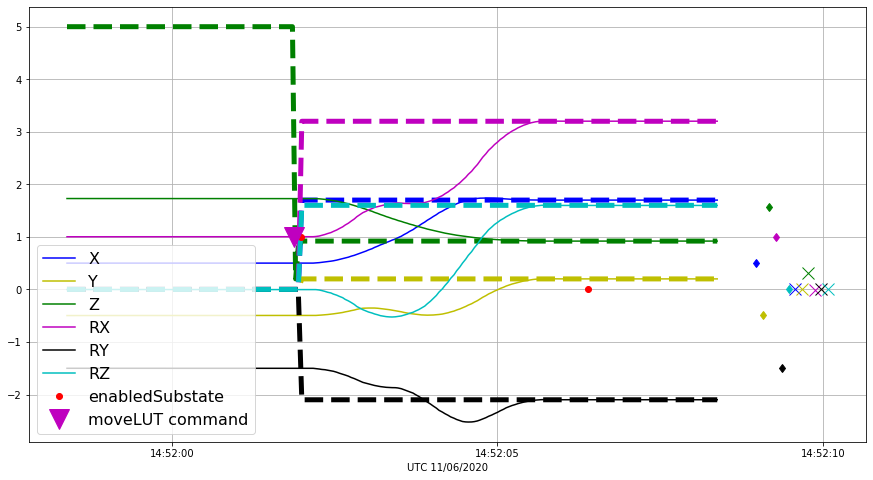

In [22]:
start3 = pd.to_datetime(dfml['private_sndStamp'][0], unit='s')-timedelta(seconds=3.5) 
end3 = pd.to_datetime(dfml['private_sndStamp'][0], unit='s')+timedelta(seconds=6.5) 
idx = np.logical_and(pd.to_datetime(df.private_sndStamp, unit='s') > start3, 
                     pd.to_datetime(df.private_sndStamp, unit='s') < end3)
df3 = df[idx]
idx = np.logical_and(pd.to_datetime(dfe.private_sndStamp, unit='s') > start3, 
                     pd.to_datetime(dfe.private_sndStamp, unit='s') < end3)
dfe3 = dfe[idx]
#idx = np.logical_and(pd.to_datetime(dfi.private_sndStamp, unit='s') > start1, pd.to_datetime(dfi.private_sndStamp, unit='s') < end1)
#dfi1 = dfi[idx]

expectedO = np.array([df3['Position%d'%i][0]+expected[i] for i in range(6)]) #if move was interpreted as Offset
expectedO = expectedO + plut

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(df3['Position%d'%i]*f, cc[i],label=xyzlabel[i])
    plt.plot(df3['Demand%d'%i]*f, '--%s'%cc[i], linewidth=5)
    plt.plot(pd.to_datetime(df3.private_sndStamp, unit='s')[-1]+timedelta(seconds=1.5+0.1*(i-3)), expected[i]*f, 'x%s'%cc[i], markersize=12)
    plt.plot(pd.to_datetime(df3.private_sndStamp, unit='s')[-1]+timedelta(seconds=1.5+0.1*(i-3)-0.6), expectedO[i]*f, 'd%s'%cc[i])
plt.plot(pd.to_datetime(dfe3.private_sndStamp, unit='s'), dfe3['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfml.private_sndStamp, unit='s'), dfc['HexapodID'],'mv', label='moveLUT command', markersize=20)
plt.legend(prop={'size': 16}, loc='lower left')
plt.xlabel('UTC 11/06/2020')
plt.grid();
#step 27: (0um, 0um, 800um, 0deg, 0deg, 0deg), moveLUT (az = 180deg, elev = 60deg, and T = 10deg)

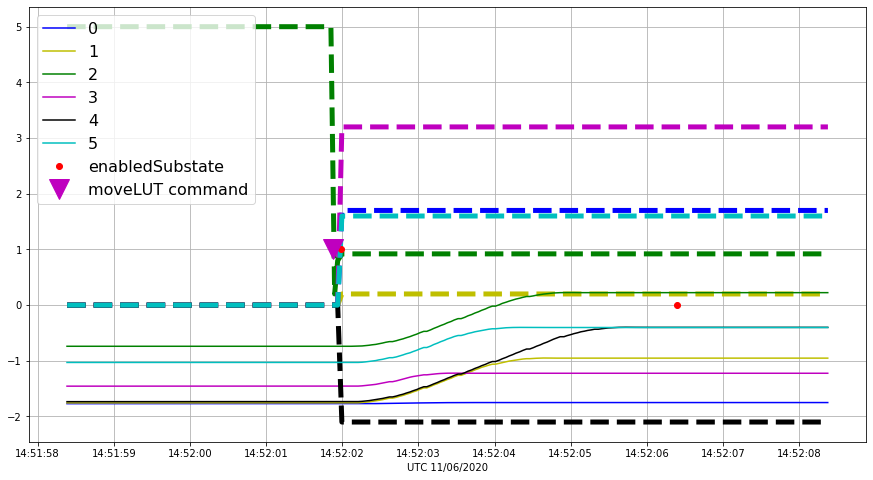

In [23]:
idx = np.logical_and(pd.to_datetime(dfs.private_sndStamp, unit='s') > start3, 
                     pd.to_datetime(dfs.private_sndStamp, unit='s') < end3)
dfs3 = dfs[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(dfs3['Calibrated%d'%i]/1000, cc[i],label='%d'%i)
    plt.plot(df3['Demand%d'%i]*f, '--%s'%cc[i], linewidth=5)
plt.plot(pd.to_datetime(dfe3.private_sndStamp, unit='s'), dfe3['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfml.private_sndStamp, unit='s'), dfc['HexapodID'],'mv', label='moveLUT command', markersize=20)
plt.legend(prop={'size': 16}, loc='upper left')
plt.xlabel('UTC 11/06/2020')
plt.grid();

#### The 4th move/motion

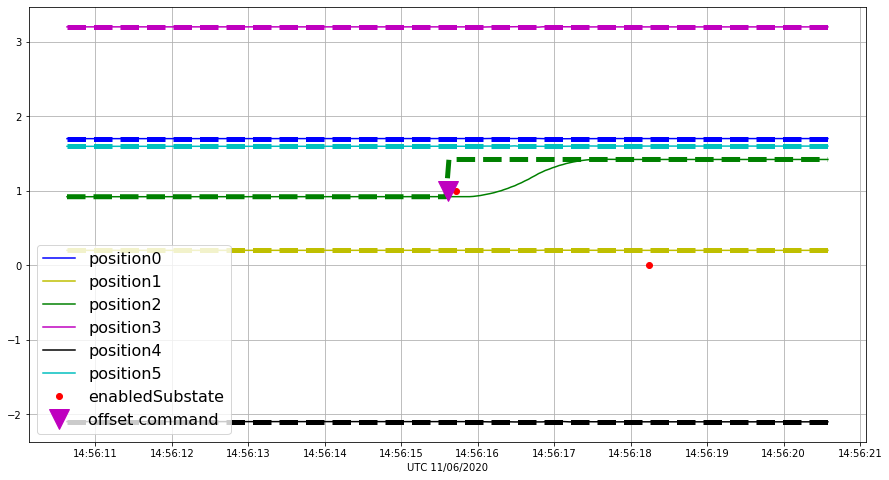

In [24]:
start4 = pd.to_datetime(dfo['private_sndStamp'][0], unit='s')-timedelta(seconds=5) 
end4 = pd.to_datetime(dfo['private_sndStamp'][0], unit='s')+timedelta(seconds=5) 
idx = np.logical_and(pd.to_datetime(df.private_sndStamp, unit='s') > start4, 
                     pd.to_datetime(df.private_sndStamp, unit='s') < end4)
df4 = df[idx]
idx = np.logical_and(pd.to_datetime(dfe.private_sndStamp, unit='s') > start4, 
                     pd.to_datetime(dfe.private_sndStamp, unit='s') < end4)
dfe4 = dfe[idx]
#idx = np.logical_and(pd.to_datetime(dfi.private_sndStamp, unit='s') > start1, pd.to_datetime(dfi.private_sndStamp, unit='s') < end1)
#dfi1 = dfi[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(df4['Position%d'%i]*f,cc[i], label='position%d'%i)
    plt.plot(df4['Demand%d'%i]*f, '--%s'%cc[i], linewidth=5)
plt.plot(pd.to_datetime(dfe4.private_sndStamp, unit='s'), dfe4['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfo.private_sndStamp, unit='s'), dfo['HexapodID'],'mv', label='offset command', markersize=20)
plt.legend(prop={'size': 16}, loc='lower left')
plt.xlabel('UTC 11/06/2020')
plt.grid();
#step 33: (0um, 0um, 500um, 0deg, 0deg, 0deg).

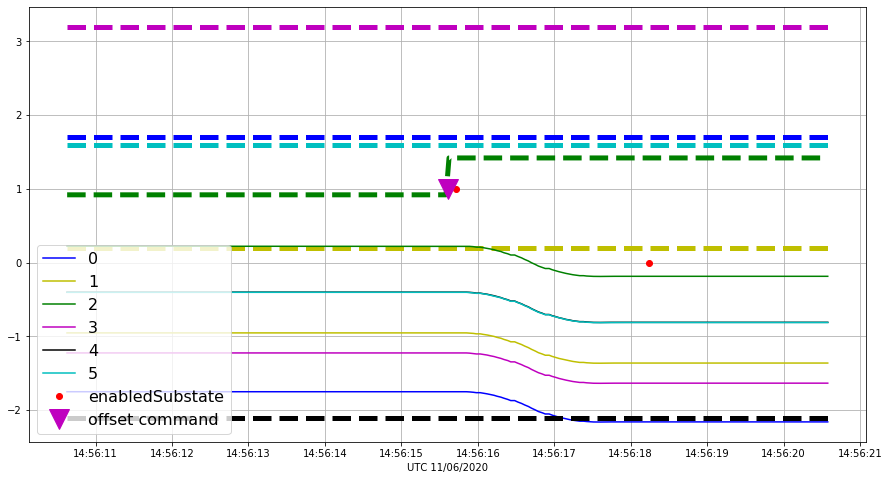

In [25]:
idx = np.logical_and(pd.to_datetime(dfs.private_sndStamp, unit='s') > start4, 
                     pd.to_datetime(dfs.private_sndStamp, unit='s') < end4)
dfs4 = dfs[idx]

fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    if i<3:
        f = 1e-3  #turn micron in mm
    else:
        f = 100 #turn degree into (1/100 deg)
    plt.plot(dfs4['Calibrated%d'%i]/1000,cc[i], label='%d'%i)
    plt.plot(df4['Demand%d'%i]*f, '--%s'%cc[i], linewidth=5)
plt.plot(pd.to_datetime(dfe4.private_sndStamp, unit='s'), dfe4['enabledSubstate'],'ro', label='enabledSubstate')
#plt.plot(pd.to_datetime(dfi1.private_sndStamp, unit='s'), dfi1['inPosition'],'mx', label='inPosition')
plt.plot(pd.to_datetime(dfo.private_sndStamp, unit='s'), dfo['HexapodID'],'mv', label='offset command', markersize=20)
plt.legend(prop={'size': 16}, loc='lower left')
plt.xlabel('UTC 11/06/2020')
plt.grid();

### we can calculate the transformation matrix

If one set of (s1,s2,s3,s4,s5,6) plus (x,y,z,rx,ry,rz) is called one measurement, how many measurements do we need?

M*S = P

* M is 6x6. It is the transformation matrix.
* S is 6xn. n is the number of measurements. Each column is (s1,s2,s3,s4,s5,s6). These are struct lengths.
* P is 6xn. P is for position. n is the number of measurements. Each column is (x,y,z,rx,ry,rz).

How many measurements do we need to figure out M?

* one measurement tells us 6 equations. But we have 36 unknowns - M is 6x6. So we need 6 measurements.

We will just use all the measurements we have, in this big time window. Some measurements were taken during motion, so they may not be very accurate. But for the majority of the time, the hexapod was sitting. So the least square fitting should give us optimal results.

In [26]:
a = df.set_index('private_seqNum')
a = a[['Position%d'%i for i in range(6)]]
b = dfs.set_index('private_seqNum')
b = b[['Calibrated%d'%i for i in range(6)]]

In [28]:
print(len(a), len(b), a.index[0], a.index[-1], b.index[0], b.index[-1])

33997 33997 25745 59741 25745 59741


In [29]:
b['Calibrated%d'%i]

private_seqNum
25745      5.496
25746      5.492
25747      5.484
25748      5.514
25749      5.504
          ...   
59737   -811.751
59738   -811.764
59739   -811.758
59740   -811.779
59741   -811.758
Name: Calibrated5, Length: 33997, dtype: float64

In [30]:
n = len(a)
structs = np.zeros((6,n))
xyz = np.zeros((6,n))
for i in range(6):
    structs[i,:] = np.array([b['Calibrated%d'%i].iloc[j] for j in range(n)]-b['Calibrated%d'%i].iloc[0])
    xyz[i,:] = np.array([a['Position%d'%i].iloc[j] for j in range(n)]-a['Position%d'%i].iloc[0])

In [31]:
for i in range(6):
    print(b['Calibrated%d'%i].iloc[0])

5.12899999999955
11.284999999999767
9.221000000003698
2.751000000002224
13.438000000004502
5.496000000000667


In [32]:
m = np.matmul(xyz, np.linalg.pinv(structs))

In [33]:
print(m)

[[-1.19941372e+00  1.20323975e+00  1.50881439e+00  2.42325311e-01
  -2.14645322e-01 -1.54084251e+00]
 [-9.63578843e-01 -1.03568658e+00 -6.75492625e-01  1.52133734e+00
   1.59340136e+00 -4.42648536e-01]
 [-2.50182142e-01 -1.81842726e-01 -2.17513001e-01 -1.55084727e-01
  -2.13349053e-01 -2.04453860e-01]
 [-3.00749492e-05 -3.06550030e-05 -2.89545989e-07  3.07670410e-05
   3.03264811e-05 -9.64977839e-08]
 [ 1.74367471e-05 -1.75736219e-05 -3.56556122e-05 -1.83969408e-05
   1.75055020e-05  3.66994258e-05]
 [ 2.35615149e-05 -2.64890220e-05  2.26851795e-05 -2.29878990e-05
   2.58739209e-05 -2.26402908e-05]]


### We can go back to check if our matrix works. 

xyzp is the predicted (x,y,z,rx,ry,rz) for this whole time window.

In [34]:
xyzp = np.matmul(m, structs)

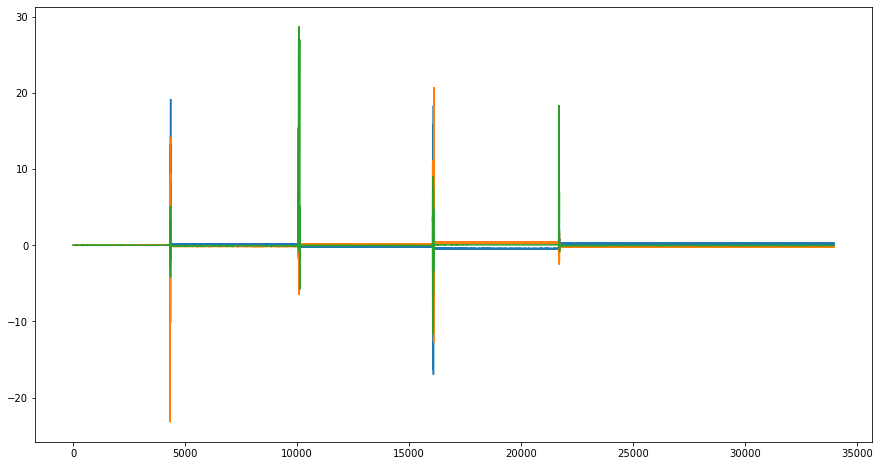

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(3): #micron
    plt.plot((xyzp[i,:]-xyz[i,:]))

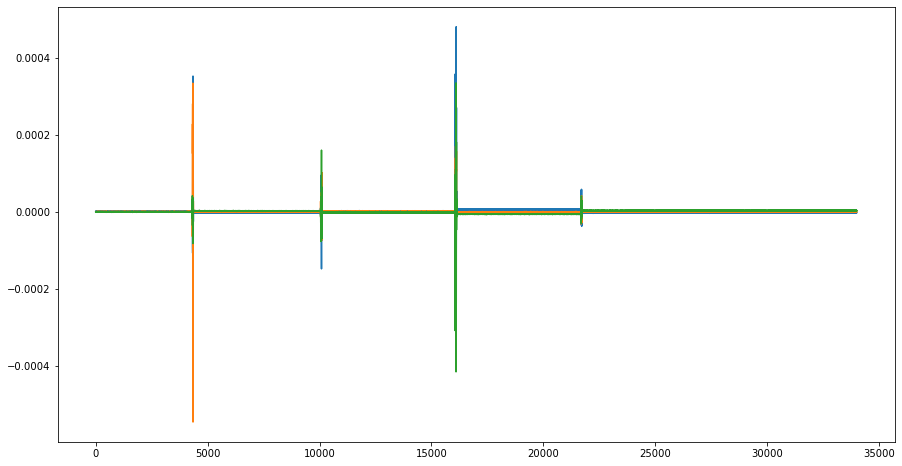

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(3,6): #degree
    plt.plot((xyzp[i,:]-xyz[i,:]))

In [37]:
#the unit for the input (struct length) = micron
#the unit for the output (x,y,z) = micron, (rx,ry,rz) = degree
np.savetxt('transM.txt',m)